# Machine learning pipeline


Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
pd.pandas.set_option('display.max_columns',None)

In [27]:
ds=pd.read_csv('lenders_sample.csv')

In [28]:
print(ds.shape) 

(15615, 14)


In [29]:
#printing top 5 records
ds.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,teresa5718,Teresa,NaN,NaN,NaN,NaN,1393520019,NaN,NaN,NaN,NaN,10,NaN,0
1,pamelamaria7176,Pamela Maria,2173780.0,NaN,NaN,NaN,1462466084,NaN,NaN,NaN,NaN,1,NaN,0
2,mireya2557,Mireya,NaN,NaN,NaN,NaN,1445444352,NaN,NaN,NaN,NaN,1,NaN,0
3,jonatan8873,Jonatan,1356784.0,NaN,NaN,NaN,1369132003,NaN,NaN,NaN,NaN,28,NaN,0
4,MichaelHaenni,Michael Haenni,2401474.0,Zürich,ZH,CH,1243806271,www.digiinfo.com,CEO,It's a good thing & fun at the same time.,Develop and sell software for the graphic indu...,29,NaN,0


1.Missing values

In [30]:
featureswithNA=[features for features in ds.columns if ds[features].isnull().sum()>1]

In [32]:
for feature in featureswithNA:
    print(feature,np.round(ds[feature].isnull().mean(),4),'% missing values')

DISPLAY_NAME 0.0006 % missing values
MAIN_PIC_ID 0.6685 % missing values
CITY 0.6496 % missing values
STATE 0.6763 % missing values
COUNTRY_CODE 0.5759 % missing values
PERSONAL_URL 0.9663 % missing values
OCCUPATION 0.7805 % missing values
LOAN_BECAUSE 0.9018 % missing values
OTHER_INFO 0.9404 % missing values
INVITED_BY 0.7379 % missing values


Is there any relationship between missing values

In [33]:
for feature in featureswithNA:
    data=ds.copy()
    #If there is a null convert it into 1(missing value) or else 0
    data[feature]=np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['IMPROVE VAL'].median().plot.bar(color='y')
    plt.title(feature)
    plt.show()

KeyError: 'Column not found: IMPROVE VAL'

Observation--> The independent variable which has more null values is inturn increasing the improve val


Identifying Numerical variables

In [36]:
Numerical=[feature for feature in ds.columns if ds[feature].dtypes!='O']
print(len(Numerical))

4


In [37]:
ds[Numerical].head()

,MAIN_PIC_ID,MEMBER_SINCE,LOAN_PURCHASE_NUM,NUM_INVITED
0,NaN,1393520019,10,0
1,2173780.0,1462466084,1,0
2,NaN,1445444352,1,0
3,1356784.0,1369132003,28,0
4,2401474.0,1243806271,29,0


There is 1 year variable[FISCAL_YEAR] in the dataset

In [43]:
year=[feature for feature in dataset[Numerical] if 'YEAR' in feature]
year

['FISCAL_YEAR', 'YEAR']

In [45]:
for feature in year:
    print(feature,dataset[feature].unique())

FISCAL_YEAR [ 2014  2015  2016 ... 21005 21006 21007]
YEAR [1985.    0. 1910. 1900. 1920. 1965. 1935. 1983. 1986. 1895. 1984. 1950.
 1925. 1890. 1915. 1997. 2005. 1891. 1854. 1957. 1968. 1887. 1885. 1987.
 1974. 1905. 1945. 1991. 1903. 1873. 1930. 1988. 1870. 1874. 1899. 1928.
 1880. 1955. 1850. 1906. 1917. 1918. 1989. 1888. 2013. 1886. 1940. 1951.
 1894. 1982. 2002. 1914. 1860. 1852. 1927. 1865. 1936. 1916. 1960. 1931.
 1975. 1963. 1981. 1898. 2012. 1904. 1878. 1855. 1892. 1856. 1884. 1868.
 1800. 1926. 1978. 1948. 1993. 2000. 1970. 1843. 1883. 1877. 1820. 1934.
 1998. 1851. 1889. 1924. 1964. 1929. 1893. 1896. 1980. 1995. 1976. 1956.
 1897. 1909. 1966. 2003. 1902. 1861. 1996. 1908. 1969. 2009. 1999. 1907.
 1967. 1977. 1840. 1872. 1990. 1858. 1959. 1921.   nan 2004. 1876. 1911.
 1862. 1882. 1973. 1871. 1864. 1912. 1923. 1913. 1875. 1879. 1979. 2001.
 1901. 1949. 1992. 1946. 1881. 1845. 2006. 1919. 1972. 1863. 2011. 1922.
 1994. 1844. 2014. 1962. 1932. 1958. 1847. 1849. 1848. 1869. 1947

In [60]:
discrete=[feature for feature in Numerical if len(dataset[feature].unique())<25 and feature not in year]
print(len(discrete))

7


In [61]:
discrete

['T-CODE', 'WARD', 'PRECINCT', 'BDLD NO', 'BEDROOM', 'BATH', 'BATH DESCRIP']

In [59]:
dataset[discrete].head()

,T-CODE,WARD,PRECINCT,BDLD NO,BEDROOM,BATH,BATH DESCRIP
0,274,7.0,1.0,1,1.0,2.0,NaN
1,274,NaN,NaN,1,NaN,NaN,NaN
2,274,5.0,2.0,1,NaN,NaN,NaN
3,274,5.0,2.0,1,7.0,3.0,NaN
4,274,NaN,NaN,1,NaN,NaN,NaN


Finding relationship between discrete feature and target variable

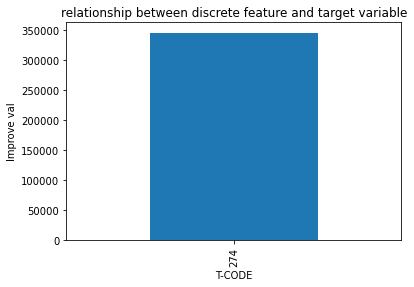

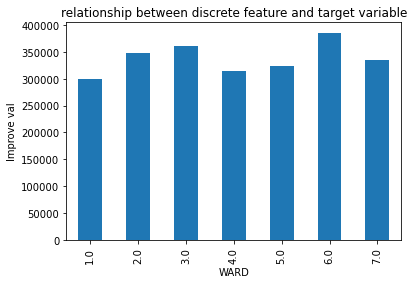

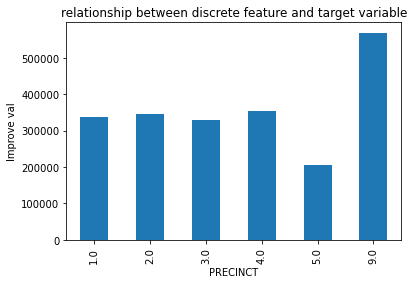

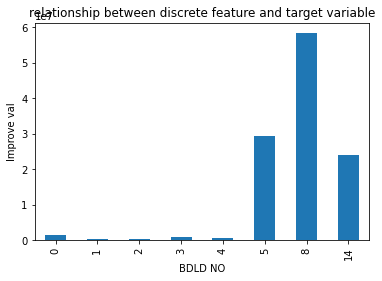

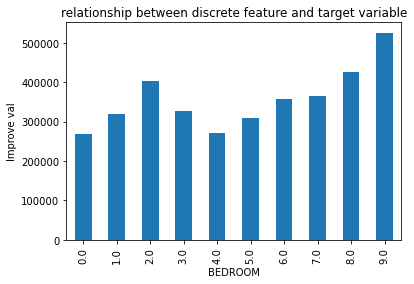

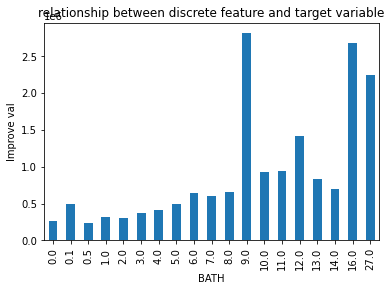

IndexError: index 0 is out of bounds for axis 0 with size 0

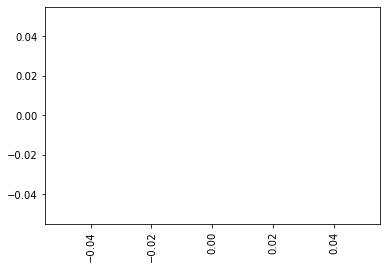

In [74]:
for feature in discrete:
    data=dataset.copy()
    data.groupby(feature)['IMPROVE VAL'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Improve val')
    plt.title("relationship between discrete feature and target variable")
    plt.show()
    #Getting an error because we have nan values in the dataset. Lets remove it in feature engineering

In [71]:
continuous=[feature for feature in Numerical if feature not in discrete+year]
print(len(continuous))

19


In [72]:
dataset[continuous].head()

,MAP,ACCOUNT,HOUSE NO,SALE PRICE,CERT NO,PARCEL VAL,LAND VAL,IMPROVE VAL,SQFT,NHBD,OCCUP,STORIES,GROSS AREA,LIVING AREA,ROOMS,PERCENT GOOD,EXEMPT AMT,TAX VALUE,AV PID
0,13,1720,26.0,169000.0,NaN,543800,398400,145400,3729,1001.0,1.0,1.8,1526.0,848.0,5.0,92.0,150674.0,5032.64,NaN
1,24,4120,0.0,0.0,NaN,1196500,1169500,27000,9100,4009.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,27,4414,0.0,0.0,NaN,48200,48200,0,830,4003.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1036.78,NaN
3,34,5508,126.0,0.0,NaN,721800,336400,385400,4630,8001.0,3.0,3.0,5583.0,3839.0,17.0,83.0,0.0,9256.07,NaN
4,37,5704,0.0,0.0,NaN,214200,201400,12800,2500,4009.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


In [38]:
for feature in continuous:
    data=ds.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title("relationship between continuous feature and target variable")
    plt.show()

NameError: name 'continuous' is not defined

Observation: 'Percent good' follows gaussian(normal) distribution.Other features are either positively/negatively skewed. We will convert this into gaussian distribution

# Transformation

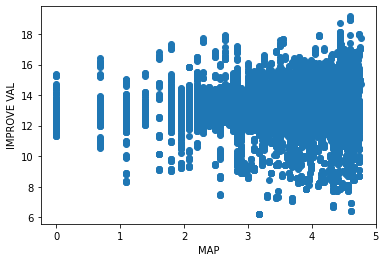

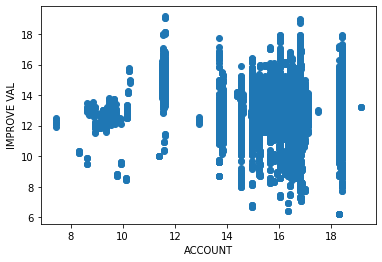

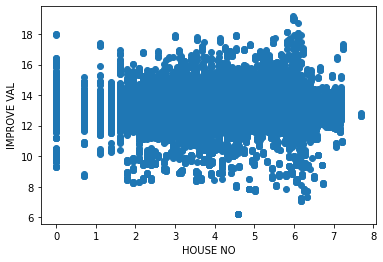

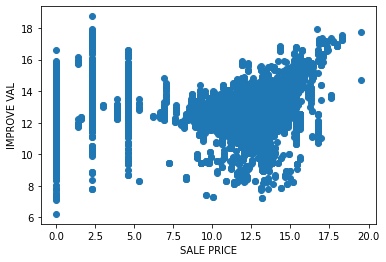

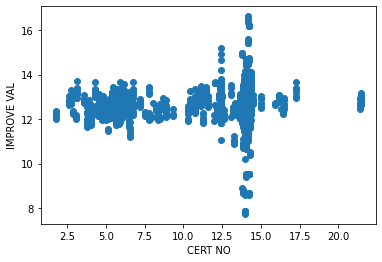

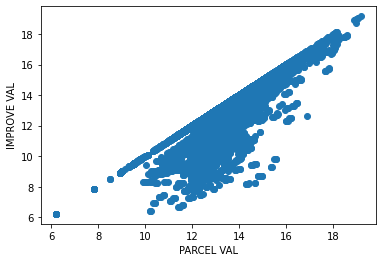

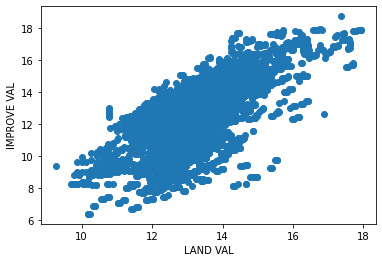

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


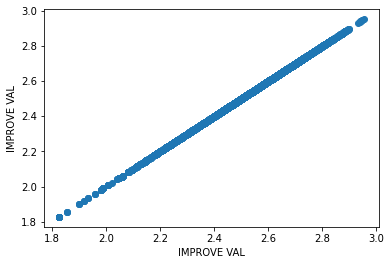

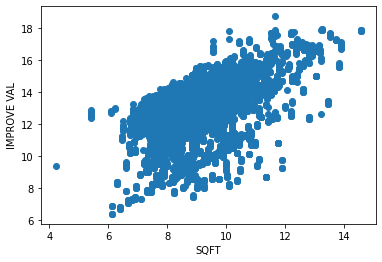

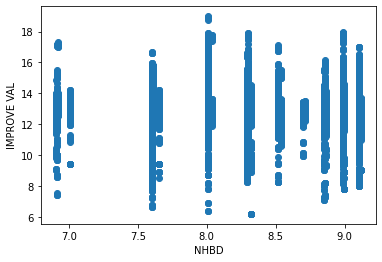

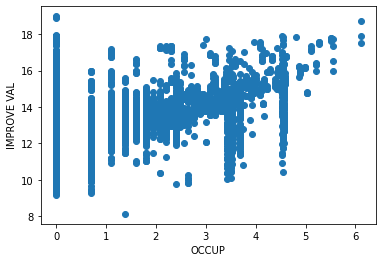

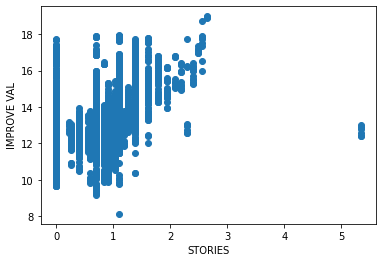

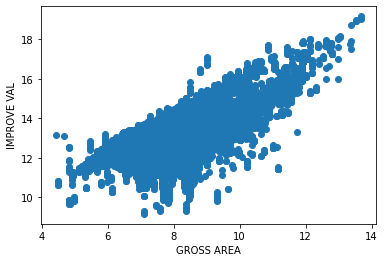

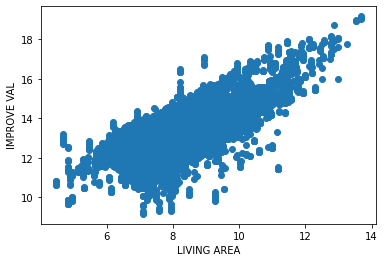

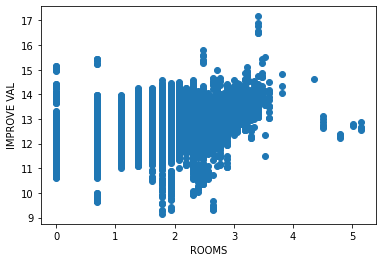

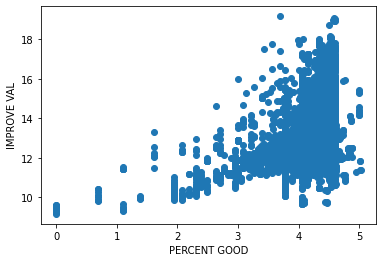

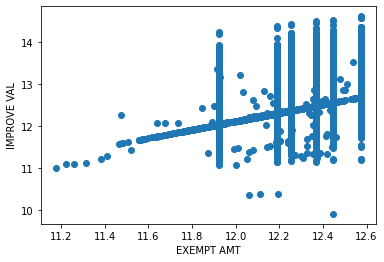

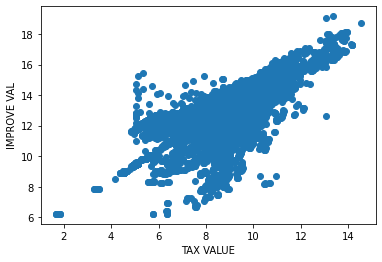

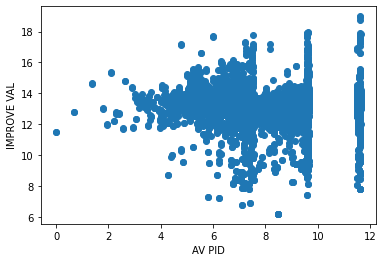

In [83]:
for feature in continuous:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data['IMPROVE VAL']=np.log(data['IMPROVE VAL'])
    plt.scatter(data[feature],data['IMPROVE VAL'])
    plt.xlabel(feature)
    plt.ylabel('IMPROVE VAL')
    plt.show()
    


2.Outliers

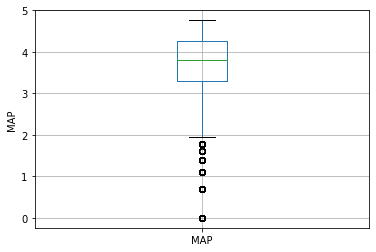

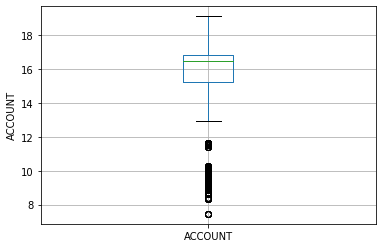

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


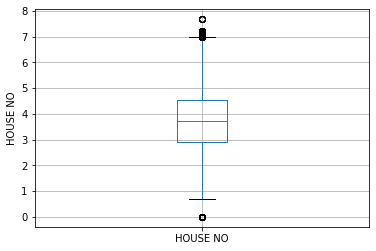

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


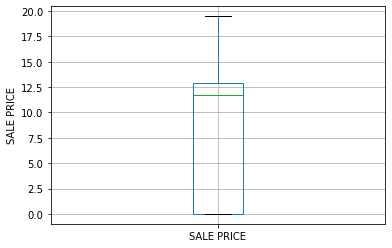

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


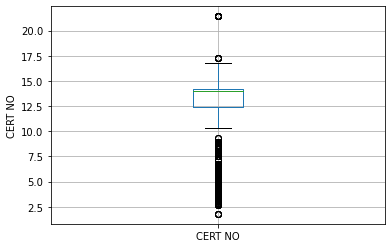

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


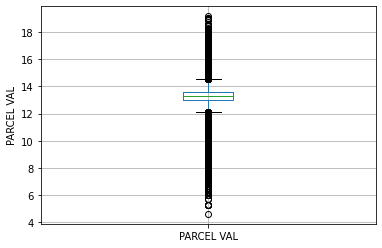

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


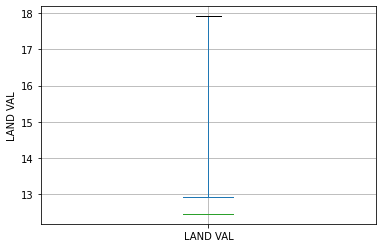

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


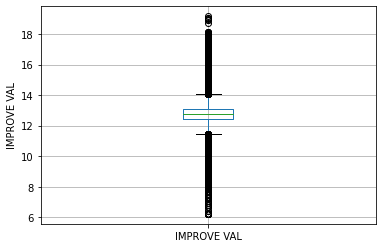

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


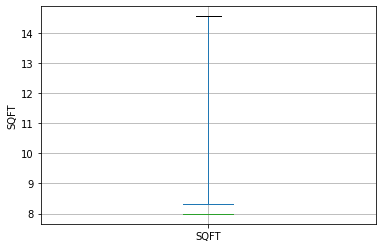

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


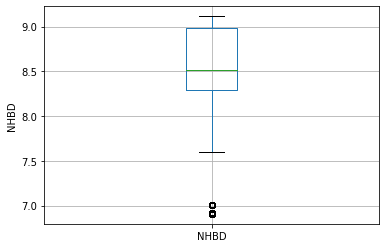

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


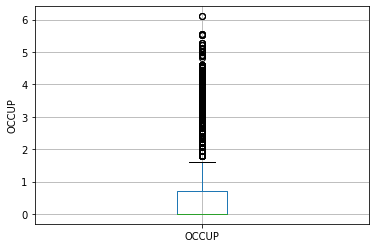

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


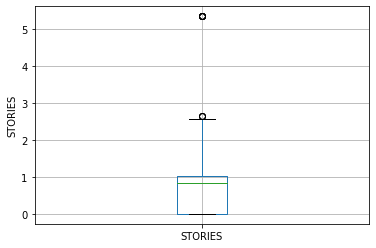

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


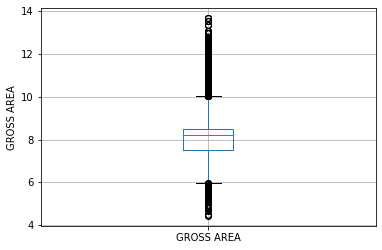

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


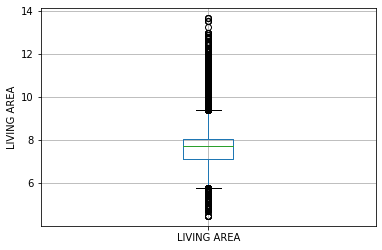

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


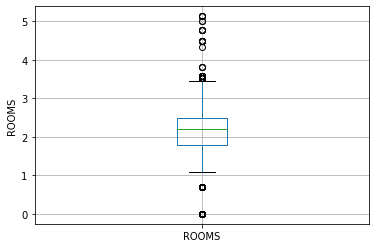

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


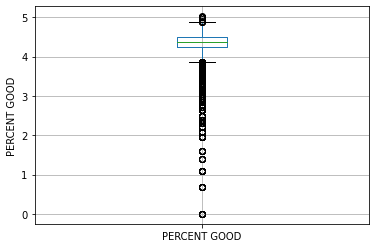

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


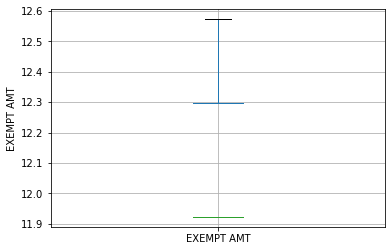

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


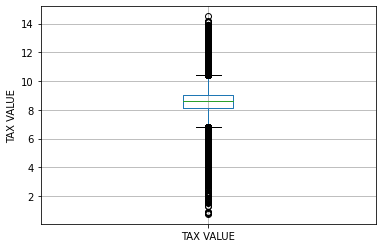

C:\Users\jgsan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


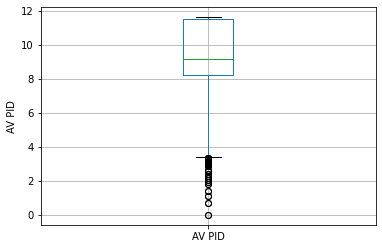

In [84]:
for feature in continuous:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

There are lot of outliers

In [86]:
Categorical=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print(len(Categorical))

44


In [87]:
Categorical

['BLOCK',
 'LOT',
 'UNIT',
 'PARCEL ID',
 'PCC',
 'PCC DESCRIPT',
 'STREET',
 'COMMITMENT OWNER',
 'CURRENT OWNER',
 'CURRENT CO-OWNER',
 'OWNER ADD',
 'OWNER CITY',
 'OWNER STATE',
 'OWNER ZIP',
 'SALE DATE',
 'BOOK PAGE',
 'BOARDER FLAG',
 'SALE VALID',
 'SITE INDEX',
 'STYLE DESCRIP',
 'WALL TYPE 1',
 'WALL TYPE 2',
 'HEAT TYPE',
 'FUEL TYPE',
 'AC TYPE',
 'KITCHEN DESCRIP',
 'GRADE DESCRIP',
 'RESX FLAG',
 'LOCAL HISTORICAL',
 'NATIONAL HISTORICAL',
 'ZONE',
 'ZONE DESP',
 'Item Type1',
 'Path1',
 'Item Type',
 'Path',
 'ROOF STRUCTURE DESCRIP',
 'ROOF COVER DESCRIP',
 'INT WALL 1 DESCRIP',
 'INT WALL 2 DESCRIP',
 'INT FLOOR 1 DESCRIP',
 'INT FLOOR  2 DESCRIP',
 'HAS GARAGE',
 'Sub Lots']

In [88]:
dataset[Categorical].head()

,BLOCK,LOT,UNIT,PARCEL ID,PCC,PCC DESCRIPT,STREET,COMMITMENT OWNER,CURRENT OWNER,CURRENT CO-OWNER,OWNER ADD,OWNER CITY,OWNER STATE,OWNER ZIP,SALE DATE,BOOK PAGE,BOARDER FLAG,SALE VALID,SITE INDEX,STYLE DESCRIP,WALL TYPE 1,WALL TYPE 2,HEAT TYPE,FUEL TYPE,AC TYPE,KITCHEN DESCRIP,GRADE DESCRIP,RESX FLAG,LOCAL HISTORICAL,NATIONAL HISTORICAL,ZONE,ZONE DESP,Item Type1,Path1,Item Type,Path,ROOF STRUCTURE DESCRIP,ROOF COVER DESCRIP,INT WALL 1 DESCRIP,INT WALL 2 DESCRIP,INT FLOOR 1 DESCRIP,INT FLOOR 2 DESCRIP,HAS GARAGE,Sub Lots
0,A,25A,NaN,013A0025A000000,1010,SING FAMLY,MEAD ST,DAVIS L. WHITNEY,DAVIS L. WHITNEY,NaN,26 MEAD ST,SOMERVILLE,MA,02144,11/10/1989,20177/ 588,N,Q,4,Cottage Bungal,Clapboard,NaN,Forced Air-Duc,Gas,None,Semi-Modern,Average,True,False,False,RB,RESIDENCE,Item,ospcd/Lists/Assessor Data 05192014,Item,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G,1,NaN,024G00001000000,9300,CITY VACANT,HIGHLAND AVE,CITY OF SOMERVILLE,CITY OF SOMERVILLE,DAVIS SQ PARKING LOT,93 HIGHLAND AVE,SOMERVILLE,MA,02143,NaN,NaN,NaN,U,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Item,ospcd/Lists/Assessor Data 05192014,Item,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,3,NaN,027B00003000000,3920,UNDEV LAND,BROADWAY,FOSTER HERBERT F & HERBERT F JR.,FOSTER HERBERT F & HERBERT F JR.,NaN,78 PUTNAM RD,SOMERVILLE,MA,02145,NaN,NaN,M,U,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Item,ospcd/Lists/Assessor Data 05192014,Item,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,21,NaN,034D00021000000,1050,THREE FAM,ALBION ST,SIGGENS JR ROBERT F,SIGGENS JR ROBERT F,NaN,45 HEMLOCK ST,ARLINGTON,MA,02474,03/21/2008,50915/ 204,N,U,3,3-Decker,Vinyl Siding,NaN,Hot Water,Oil,None,Modern,Average,False,False,False,RB,RESIDENCE,Item,ospcd/Lists/Assessor Data 05192014,Item,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B,1,NaN,037B00001000000,972V,MBTA VACANT,SOMERVILLE AVE,MBTA,MBTA,C/O BRENNAN MICHAEL R E DIRECTOR,10 PARK PLAZA SUITE 5750,BOSTON,MA,02116,NaN,NaN,NaN,U,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Item,ospcd/Lists/Assessor Data 05192014,Item,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
for feature in Categorical:
    print('features is {} and number of categories is {}'.format(feature,len(dataset[feature].unique())))

features is BLOCK and number of categories is 13
features is LOT and number of categories is 154
features is UNIT and number of categories is 1162
features is PARCEL ID and number of categories is 19316
features is PCC and number of categories is 167
features is PCC DESCRIPT and number of categories is 123
features is STREET and number of categories is 661
features is COMMITMENT OWNER and number of categories is 23381
features is CURRENT OWNER and number of categories is 16299
features is CURRENT CO-OWNER and number of categories is 9882
features is OWNER ADD and number of categories is 20681
features is OWNER CITY and number of categories is 809
features is OWNER STATE and number of categories is 58
features is OWNER ZIP and number of categories is 1773
features is SALE DATE and number of categories is 6425
features is BOOK PAGE and number of categories is 20356
features is BOARDER FLAG and number of categories is 10
features is SALE VALID and number of categories is 3
features is SIT

Realtionship between categorical feature and target variable

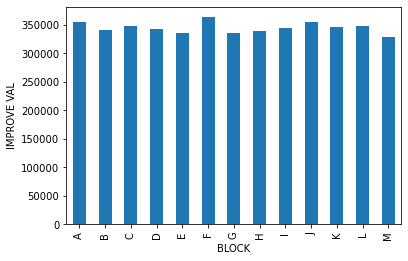

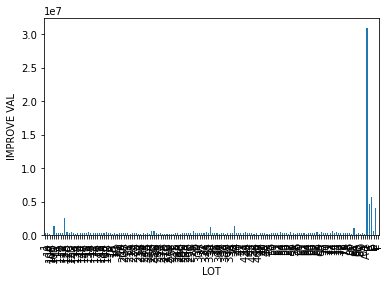

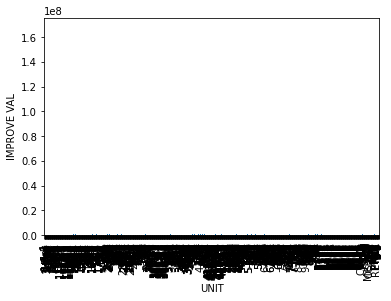

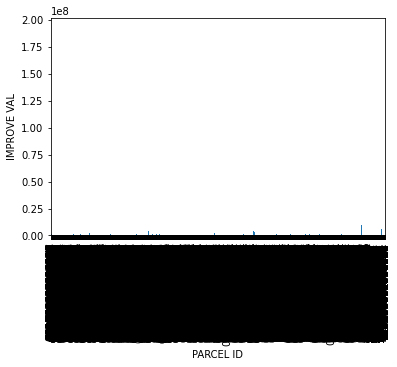

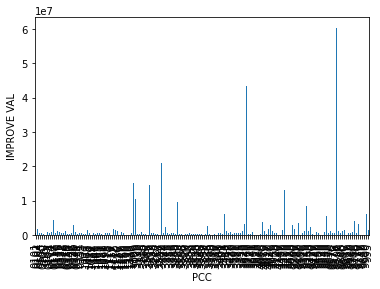

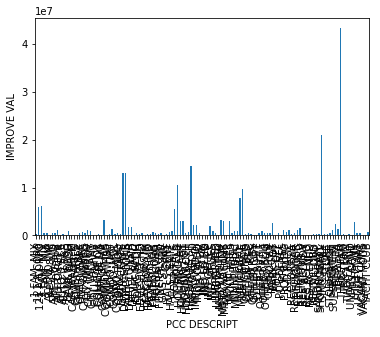

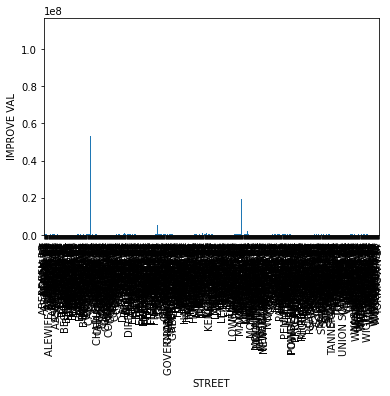

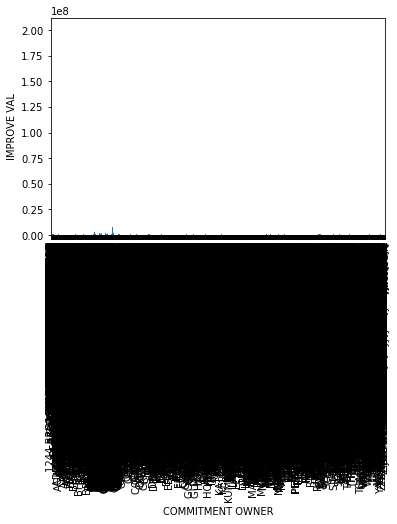

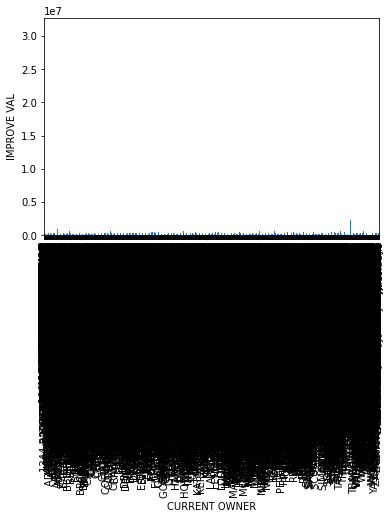

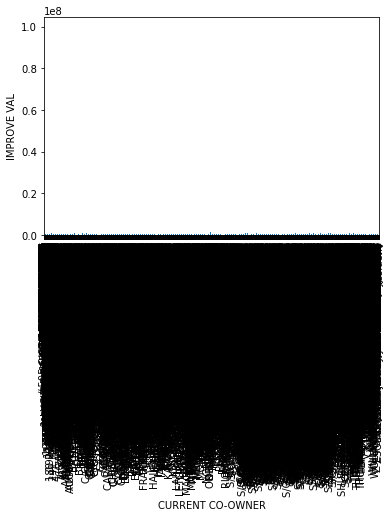

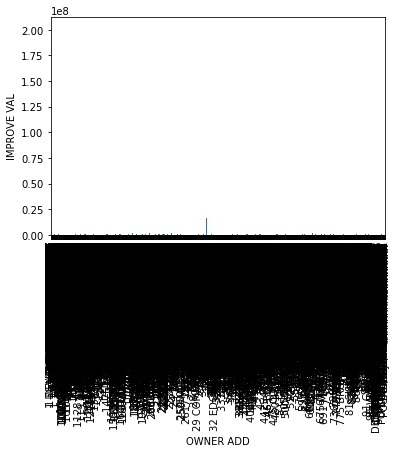

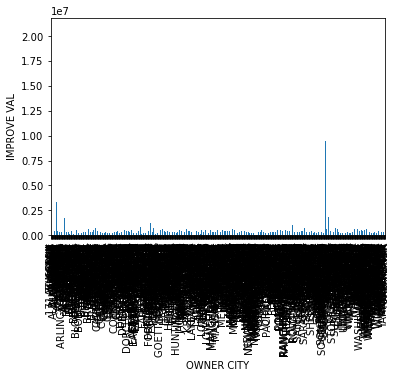

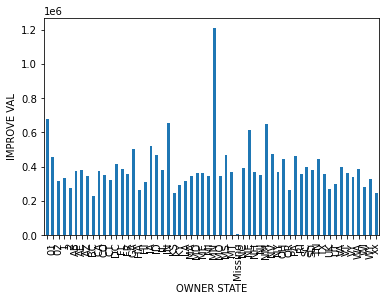

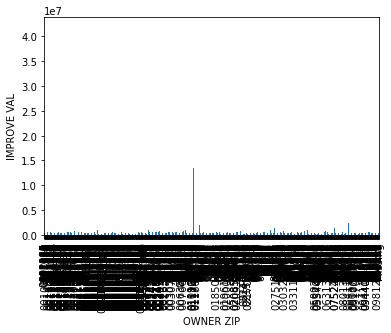

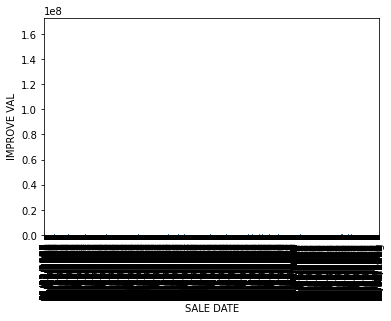

In [ ]:
for feature in Categorical:
    data=dataset.copy()
    data.groupby(feature)['IMPROVE VAL'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('IMPROVE VAL')
    plt.show()

# Feature Engineering

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dataset,dataset['IMPROVE VAL'],test_size=0.1,random_state=0)

In [100]:
X_train.shape

(97109, 72)

In [102]:
X_test.shape

(10790, 72)

In [106]:
Tdataset=X_train

In [107]:
Tdataset.shape

(97109, 72)

In [109]:
#Handling categorical features
featureswithNAN=[feature for feature in Tdataset.columns if Tdataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in featureswithNAN:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

UNIT: 0.6643% missing values
COMMITMENT OWNER: 0.0036% missing values
CURRENT OWNER: 0.6845% missing values
CURRENT CO-OWNER: 0.6443% missing values
OWNER ADD: 0.0015% missing values
OWNER CITY: 0.0015% missing values
OWNER STATE: 0.0018% missing values
OWNER ZIP: 0.0071% missing values
SALE DATE: 0.2615% missing values
BOOK PAGE: 0.1299% missing values
BOARDER FLAG: 0.0185% missing values
SALE VALID: 0.0427% missing values
SITE INDEX: 0.0111% missing values
STYLE DESCRIP: 0.029% missing values
WALL TYPE 1: 0.029% missing values
WALL TYPE 2: 0.8418% missing values
HEAT TYPE: 0.029% missing values
FUEL TYPE: 0.029% missing values
AC TYPE: 0.0296% missing values
KITCHEN DESCRIP: 0.0854% missing values
GRADE DESCRIP: 0.029% missing values
RESX FLAG: 0.0413% missing values
LOCAL HISTORICAL: 0.0409% missing values
NATIONAL HISTORICAL: 0.0409% missing values
ZONE: 0.0132% missing values
ZONE DESP: 0.0133% missing values
Item Type1: 0.1753% missing values
Path1: 0.3513% missing values
Item Ty

In [111]:
Tdataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97109 entries, 75655 to 68268
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   T-CODE                  97109 non-null  int64  
 1   FISCAL_YEAR             97109 non-null  int64  
 2   MAP                     97109 non-null  int64  
 3   BLOCK                   97109 non-null  object 
 4   LOT                     97109 non-null  object 
 5   UNIT                    32590 non-null  object 
 6   PARCEL ID               97109 non-null  object 
 7   PCC                     97109 non-null  object 
 8   PCC DESCRIPT            97109 non-null  object 
 9   ACCOUNT                 97109 non-null  int64  
 10  HOUSE NO                96744 non-null  float64
 11  STREET                  97109 non-null  object 
 12  COMMITMENT OWNER        96754 non-null  object 
 13  CURRENT OWNER           30610 non-null  object 
 14  CURRENT CO-OWNER        34559 non-

In [112]:
Tdataset.describe()

,T-CODE,FISCAL_YEAR,MAP,ACCOUNT,HOUSE NO,SALE PRICE,CERT NO,WARD,PRECINCT,PARCEL VAL,LAND VAL,IMPROVE VAL,SQFT,NHBD,BDLD NO,OCCUP,STORIES,GROSS AREA,LIVING AREA,ROOMS,BEDROOM,BATH,BATH DESCRIP,PERCENT GOOD,YEAR,EXEMPT AMT,TAX VALUE,AV PID
count,97109.0,97109.000000,97109.000000,9.710900e+04,96744.000000,9.688900e+04,3.466000e+03,91294.000000,91249.000000,9.710900e+04,9.710900e+04,9.710900e+04,9.710900e+04,93164.000000,97109.000000,94291.000000,94331.000000,94298.000000,94298.000000,85410.000000,85451.000000,85455.000000,0.0,94298.000000,96993.000000,96267.000000,9.616400e+04,34044.000000
mean,274.0,3683.435325,48.714918,1.603587e+07,91.925846,3.546265e+05,9.236941e+06,3.925242,1.984767,8.405762e+05,3.032821e+05,5.372940e+05,4.334873e+03,5479.970987,1.044311,2.317814,2.070125,4580.107235,3226.488600,9.319342,3.961089,2.150719,NaN,78.419447,1861.957760,112524.253690,8.004360e+03,32629.088591
std,0.0,4282.805209,28.670006,1.772985e+07,150.295926,2.434890e+06,1.275922e+08,1.994375,0.798643,2.689329e+06,9.635597e+05,2.183461e+06,2.640461e+04,2536.844716,0.366761,6.664560,1.855478,13284.110571,11862.925814,4.680121,1.989462,1.112279,NaN,12.836169,316.698499,115222.368465,2.630492e+04,44186.236931
min,274.0,2014.000000,1.000000,1.720000e+03,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,274.0,2015.000000,27.000000,4.220081e+06,18.000000,1.000000e+00,2.553400e+05,2.000000,1.000000,4.473000e+05,0.000000e+00,2.522000e+05,0.000000e+00,4001.000000,1.000000,1.000000,1.000000,1787.000000,1264.000000,6.000000,2.000000,1.000000,NaN,69.000000,1900.000000,0.000000,3.446960e+03,3949.000000
50%,274.0,2017.000000,45.000000,1.449406e+07,41.000000,1.300000e+05,1.218250e+06,4.000000,2.000000,6.110000e+05,2.561000e+05,3.455000e+05,2.951000e+03,5009.000000,1.000000,1.000000,2.300000,3651.000000,2240.000000,9.000000,4.000000,2.000000,NaN,78.000000,1904.000000,150674.000000,5.688675e+03,9704.000000
75%,274.0,2018.000000,71.000000,2.007812e+07,93.000000,4.120000e+05,1.444071e+06,6.000000,3.000000,8.168000e+05,4.134000e+05,4.904000e+05,4.036000e+03,8001.000000,1.000000,2.000000,2.800000,4964.000000,3120.000000,12.000000,5.000000,3.000000,NaN,89.000000,1920.000000,223875.000000,8.473070e+03,100761.250000
max,274.0,21007.000000,117.000000,2.019006e+08,2153.000000,2.910403e+08,2.016007e+09,7.000000,9.000000,2.115322e+08,6.041970e+07,2.115322e+08,2.076278e+06,9102.000000,14.000000,447.000000,208.000000,860111.000000,860111.000000,170.000000,9.000000,27.000000,NaN,152.000000,2018.000000,288539.000000,2.010341e+06,112977.000000


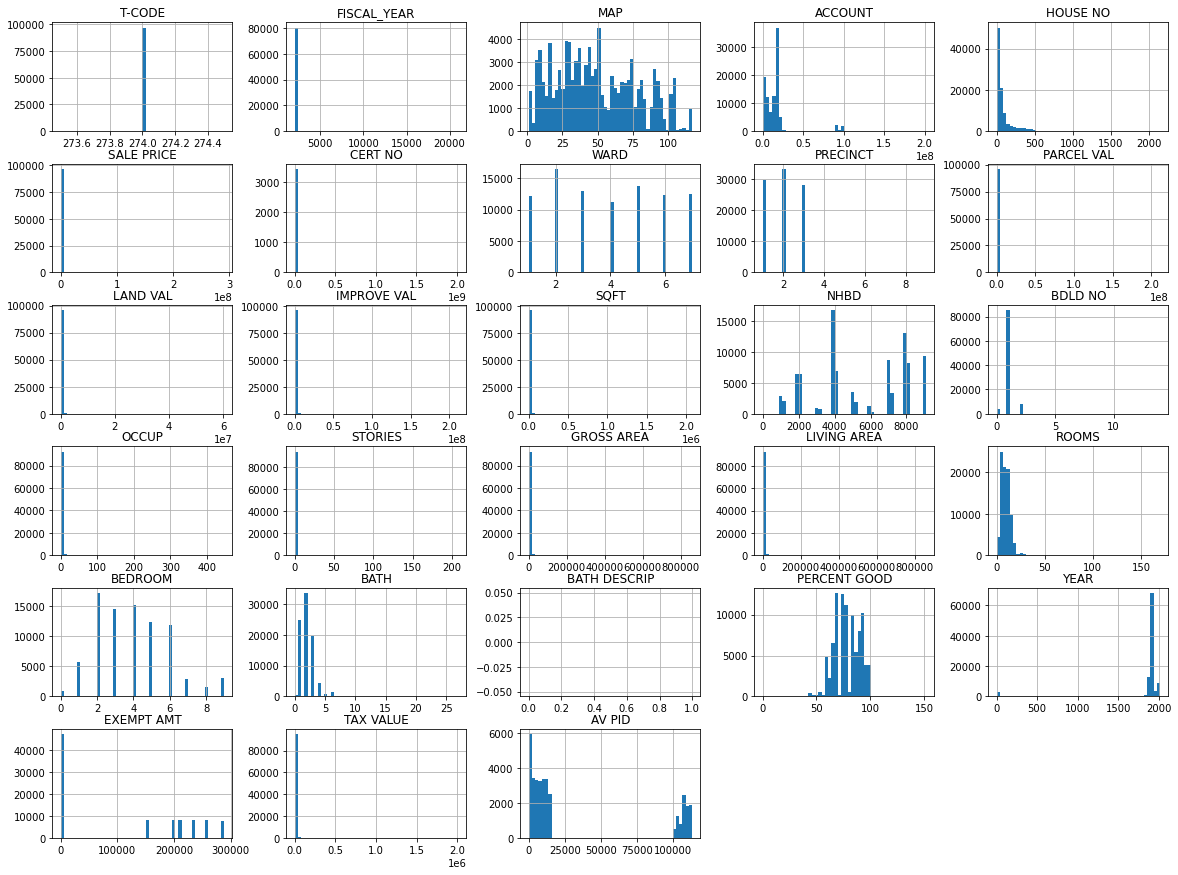

In [115]:
Tdataset.hist(bins=50,figsize=(20,15))
plt.show()

In [117]:
len(Tdataset)

97109

In [119]:
Testdataset=X_test

In [120]:
Testdataset.head()

,T-CODE,FISCAL_YEAR,MAP,BLOCK,LOT,UNIT,PARCEL ID,PCC,PCC DESCRIPT,ACCOUNT,HOUSE NO,STREET,COMMITMENT OWNER,CURRENT OWNER,CURRENT CO-OWNER,OWNER ADD,OWNER CITY,OWNER STATE,OWNER ZIP,SALE PRICE,SALE DATE,BOOK PAGE,CERT NO,BOARDER FLAG,SALE VALID,WARD,PRECINCT,PARCEL VAL,LAND VAL,IMPROVE VAL,SQFT,NHBD,SITE INDEX,BDLD NO,OCCUP,STYLE DESCRIP,STORIES,WALL TYPE 1,WALL TYPE 2,HEAT TYPE,FUEL TYPE,AC TYPE,GROSS AREA,LIVING AREA,ROOMS,BEDROOM,BATH,BATH DESCRIP,KITCHEN DESCRIP,PERCENT GOOD,GRADE DESCRIP,YEAR,RESX FLAG,LOCAL HISTORICAL,NATIONAL HISTORICAL,ZONE,ZONE DESP,EXEMPT AMT,TAX VALUE,Item Type1,Path1,Item Type,Path,ROOF STRUCTURE DESCRIP,ROOF COVER DESCRIP,INT WALL 1 DESCRIP,INT WALL 2 DESCRIP,INT FLOOR 1 DESCRIP,INT FLOOR 2 DESCRIP,HAS GARAGE,Sub Lots,AV PID
64366,274,2017,36,A,17,5,036A00017000005,1020,CONDO MDL-,20010930,36.0,LINDEN AVE,POSTLEWAITE BRIAN C,NaN,POLLOCK MARGARET C,36 LINDEN AVE #5,SOMERVILLE,MA,02144,330000.0,04/09/2007,49256/ 467,NaN,N,Q,5.0,3.0,385600,0,385600,0,8102.0,3,1,1.0,Duplex,2.0,Vinyl Siding,NaN,Hot Water,Gas,None,726.0,726.0,4.0,2.0,1.0,NaN,Modern,89.0,Average,1860.0,True,False,False,RB,RESIDENCE,235399.0,1761.64,Item,ospcd/Lists/Assessor Data FY2017 05162017,Item,sites/cos/ospcd/Lists/Assessor Data FY2017 051...,Asph/F Gls/Cmp,Gable/Hip,Drywall/Sheet,NaN,Pine/Soft Wood,NaN,N,NaN,NaN
83785,274,2018,27,E,9,2,027E00009000002,1020,CONDO MDL-,20050420,121.0,BOSTON AVE,MAHER RICHARD A & JANE H SUCCESSORS TRST,NaN,MAHER REALTY TRUST,77 DASCOMB RD,ANDOVER,MA,01810,1.0,06/09/2009,52950/ 342,NaN,N,U,5.0,2.0,416400,0,416400,0,4102.0,2,1,1.0,Two decker,1.0,Asbest Shingle,NaN,Steam,Gas,Central,2552.0,1005.0,6.0,2.0,2.0,NaN,Semi-Modern,83.0,Average,1925.0,False,False,False,RA,RESIDENCE,0.0,5796.25,NaN,NaN,Item,sites/cos/ospcd/Lists/Assessor Data FY2018 051...,Asph/F Gls/Cmp,Gable/Hip,Wall Brd/Wood,NaN,Hardwood,Pine/Soft Wood,N,NaN,103411.0
62999,274,2017,8,A,13,NaN,008A00013000000,1040,TWO FAMILY,18583092,66.0,RAYMOND AVE,ROMA JOHN R & JEAN M,NaN,NaN,3 SAGAMORE RD,ARLINGTON,MA,02474,37000.0,NaN,12821/ 464,NaN,N,U,7.0,3.0,627100,419200,207900,3700,4001.0,2,1,2.0,2-Decker,2.0,Vinyl Siding,NaN,Forced Air-Duc,Gas,None,3899.0,2286.0,11.0,4.0,2.0,NaN,Standard,68.0,Average,1910.0,False,False,False,RA,RESIDENCE,0.0,7410.53,Item,ospcd/Lists/Assessor Data FY2017 05162017,Item,sites/cos/ospcd/Lists/Assessor Data FY2017 051...,Gable/Hip,Asph/F Gls/Cmp,Plastered,NaN,Hardwood,NaN,N,NaN,NaN
71403,274,2018,93,D,18,NaN,093D00018000000,1110,APT 4-8 MD,2030096,56.0,ALSTON ST,ALSTON-CROSS STREETS TRUST LLC,NaN,NaN,1 NAOMI DR,GLOUCESTER,MA,01930,1.0,01/31/2013,61097/ 131,NaN,N,U,3.0,1.0,765700,308000,457700,4500,9011.0,2,2,4.0,Family Duplex-A,2.0,Vinyl Siding,NaN,Forced Air-Duc,Gas,None,6466.0,4000.0,16.0,8.0,4.0,NaN,Semi-Modern,59.0,Average,1900.0,False,False,False,BB,BUSINESS B,0.0,8773.01,NaN,NaN,Item,sites/cos/ospcd/Lists/Assessor Data FY2018 051...,Flat,T&G/Rubber,Plastered,Drywall/Sheet,Hardwood,NaN,Y,NaN,1527.0
48427,274,2016,22,H,21,50-1,022H000210050-1,1020,CONDO MDL-,20101270,50.0,MEACHAM RD,DONN JAMES,NaN,NaN,14 DADANT DRIVE,WILMINGTON,MA,02144,260000.0,08/01/2009,51526/ 485,NaN,N,U,6.0,1.0,432100,0,432100,0,4102.0,4,1,1.0,Duplex,1.0,Vinyl Siding,NaN,Forced Air-Duc,Gas,None,950.0,825.0,4.0,2.0,2.0,NaN,Modern,84.0,Average +10,1900.0,False,False,False,RB,RESIDENCE,0.0,5476.63,Item,ospcd/Lists/Assessor Data FY2016 05172016,Item,sites/cos/ospcd/Lists/Assessor Data FY2016 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

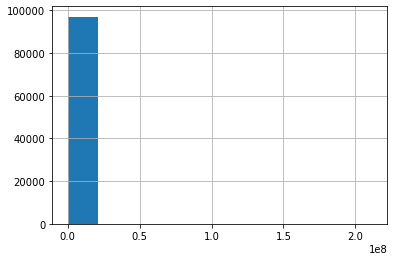

In [122]:
Tdataset['IMPROVE VAL'].hist()

In [135]:
#Replacing categorical values as 'Missing'

featuresNAN=[feature for feature in Tdataset.columns if Tdataset[feature].isnull().sum()>1 and Tdataset[feature].dtypes=='O']

for feature in featuresNAN:
    print("{}: {}% missing values".format(feature,np.round(Tdataset[feature].isnull().mean(),4)))
def replace_cat_feature(Tdataset,features_nan):
    data=Tdataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

Tdataset=replace_cat_feature(Tdataset,featuresNAN)

Tdataset[featuresNAN].isnull().sum()

UNIT: 0.6644% missing values
COMMITMENT OWNER: 0.0037% missing values
CURRENT OWNER: 0.6848% missing values
CURRENT CO-OWNER: 0.6441% missing values
OWNER ADD: 0.0015% missing values
OWNER CITY: 0.0015% missing values
OWNER STATE: 0.0018% missing values
OWNER ZIP: 0.0069% missing values
SALE DATE: 0.2606% missing values
BOOK PAGE: 0.1294% missing values
BOARDER FLAG: 0.0184% missing values
SALE VALID: 0.0423% missing values
SITE INDEX: 0.0112% missing values
STYLE DESCRIP: 0.0289% missing values
WALL TYPE 1: 0.0289% missing values
WALL TYPE 2: 0.8425% missing values
HEAT TYPE: 0.0289% missing values
FUEL TYPE: 0.0289% missing values
AC TYPE: 0.0295% missing values
KITCHEN DESCRIP: 0.085% missing values
GRADE DESCRIP: 0.0289% missing values
RESX FLAG: 0.0409% missing values
LOCAL HISTORICAL: 0.0405% missing values
NATIONAL HISTORICAL: 0.0405% missing values
ZONE: 0.0133% missing values
ZONE DESP: 0.0134% missing values
Item Type1: 0.175% missing values
Path1: 0.3506% missing values
Item

UNIT                      0
COMMITMENT OWNER          0
CURRENT OWNER             0
CURRENT CO-OWNER          0
OWNER ADD                 0
OWNER CITY                0
OWNER STATE               0
OWNER ZIP                 0
SALE DATE                 0
BOOK PAGE                 0
BOARDER FLAG              0
SALE VALID                0
SITE INDEX                0
STYLE DESCRIP             0
WALL TYPE 1               0
WALL TYPE 2               0
HEAT TYPE                 0
FUEL TYPE                 0
AC TYPE                   0
KITCHEN DESCRIP           0
GRADE DESCRIP             0
RESX FLAG                 0
LOCAL HISTORICAL          0
NATIONAL HISTORICAL       0
ZONE                      0
ZONE DESP                 0
Item Type1                0
Path1                     0
Item Type                 0
Path                      0
ROOF STRUCTURE DESCRIP    0
ROOF COVER DESCRIP        0
INT WALL 1 DESCRIP        0
INT WALL 2 DESCRIP        0
INT FLOOR 1 DESCRIP       0
INT FLOOR  2 DESCRIP

In [137]:

## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in Tdataset.columns if Tdataset[feature].isnull().sum()>1 and Tdataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(Tdataset[feature].isnull().mean(),4)))


#Replacing numerical missing values
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=Tdataset[feature].median()
    
    ## create a new feature to capture nan values
    Tdataset[feature+'nan']=np.where(Tdataset[feature].isnull(),1,0)
    Tdataset[feature].fillna(median_value,inplace=True)
    
Tdataset[numerical_with_nan].isnull().sum()

HOUSE NO: 0.0038% missing value
SALE PRICE: 0.0023% missing value
CERT NO: 0.9643% missing value
WARD: 0.0599% missing value
PRECINCT: 0.0603% missing value
NHBD: 0.0406% missing value
OCCUP: 0.029% missing value
STORIES: 0.0286% missing value
GROSS AREA: 0.0289% missing value
LIVING AREA: 0.0289% missing value
ROOMS: 0.1205% missing value
BEDROOM: 0.1201% missing value
BATH: 0.12% missing value
BATH DESCRIP: 1.0% missing value
PERCENT GOOD: 0.0289% missing value
YEAR: 0.0012% missing value
EXEMPT AMT: 0.0087% missing value
TAX VALUE: 0.0097% missing value
AV PID: 0.6494% missing value


HOUSE NO            0
SALE PRICE          0
CERT NO             0
WARD                0
PRECINCT            0
NHBD                0
OCCUP               0
STORIES             0
GROSS AREA          0
LIVING AREA         0
ROOMS               0
BEDROOM             0
BATH                0
BATH DESCRIP    97109
PERCENT GOOD        0
YEAR                0
EXEMPT AMT          0
TAX VALUE           0
AV PID              0
dtype: int64

In [138]:
Tdataset.head()

,T-CODE,FISCAL_YEAR,MAP,BLOCK,LOT,UNIT,PARCEL ID,PCC,PCC DESCRIPT,ACCOUNT,HOUSE NO,STREET,COMMITMENT OWNER,CURRENT OWNER,CURRENT CO-OWNER,OWNER ADD,OWNER CITY,OWNER STATE,OWNER ZIP,SALE PRICE,SALE DATE,BOOK PAGE,CERT NO,BOARDER FLAG,SALE VALID,WARD,PRECINCT,PARCEL VAL,LAND VAL,IMPROVE VAL,SQFT,NHBD,SITE INDEX,BDLD NO,OCCUP,STYLE DESCRIP,STORIES,WALL TYPE 1,WALL TYPE 2,HEAT TYPE,FUEL TYPE,AC TYPE,GROSS AREA,LIVING AREA,ROOMS,BEDROOM,BATH,BATH DESCRIP,KITCHEN DESCRIP,PERCENT GOOD,GRADE DESCRIP,YEAR,RESX FLAG,LOCAL HISTORICAL,NATIONAL HISTORICAL,ZONE,ZONE DESP,EXEMPT AMT,TAX VALUE,Item Type1,Path1,Item Type,Path,ROOF STRUCTURE DESCRIP,ROOF COVER DESCRIP,INT WALL 1 DESCRIP,INT WALL 2 DESCRIP,INT FLOOR 1 DESCRIP,INT FLOOR 2 DESCRIP,HAS GARAGE,Sub Lots,AV PID,HOUSE NOnan,SALE PRICEnan,CERT NOnan,WARDnan,PRECINCTnan,NHBDnan,OCCUPnan,STORIESnan,GROSS AREAnan,LIVING AREAnan,ROOMSnan,BEDROOMnan,BATHnan,BATH DESCRIPnan,PERCENT GOODnan,YEARnan,EXEMPT AMTnan,TAX VALUEnan,AV PIDnan
75655,274,2018,8,F,9,Missing,008F00009000000,1040,TWO FAMILY,7286015,3.0,WATSON ST,FIRESIDE DANIEL,Missing,RIVERA LISA,3 WATSON ST,SOMERVILLE,MA,02144,664000.0,07/15/2005,45628/ 292,1218250.0,N,Q,7.0,2.0,868600,503800,364800,2800,4001.0,3,1,2.0,Two Family,2.8,Asbest Shingle,Missing,Hot Water,Gas,None,4834.0,3076.0,13.0,6.0,2.0,NaN,Standard,83.0,Average +5,1910.0,True,False,False,RA,RESIDENCE,254867.0,8385.66,Missing,Missing,Item,sites/cos/ospcd/Lists/Assessor Data FY2018 051...,Gable/Hip,Asph/F Gls/Cmp,Plastered,Missing,Hardwood,Missing,N,Missing,2723.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
54841,274,2017,50,F,20,Missing,050F00020000000,112C,APT OVER 8,4185069,136.0,SCHOOL ST,GALLAGHER MICHAEL J & MICHAEL TRS,Missing,FALDUFF REALTY TRUST,PO BOX 1095,WATERTOWN,MA,02472,220000.0,06/16/1995,25414/ 432,1218250.0,N,U,3.0,2.0,966600,522000,444600,6616,8012.0,0,1,9.0,Apartments,2.0,WOOD FRAME,Brick Veneer,Hot Water,Gas,None,5710.0,5292.0,9.0,4.0,2.0,NaN,Missing,72.0,Average,1970.0,False,False,False,RC,RESIDENCE,0.0,11431.92,Item,ospcd/Lists/Assessor Data FY2017 05162017,Item,sites/cos/ospcd/Lists/Assessor Data FY2017 051...,Flat,T&G/Rubber,Drywall/Sheet,Missing,Carpet,Missing,N,Missing,9704.0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1
30180,274,2015,112,A,13,Missing,112A00013000000,3370,PARK LOT,20079975,26.0,CHESTNUT ST,26-LAWRENCE REALTY LLC,26-LAWRENCE REALTY LLC,C/O SPECIALIZED CARRIER INC,300 TRADE CENTER STE 5410,WOBURN,MA,01801,2200000.0,12/15/1988,19535/ 215,1218250.0,N,U,2.0,1.0,950500,866500,84000,28627,3003.0,I,1,1.0,Missing,2.3,Missing,Missing,Missing,Missing,Missing,3651.0,2240.0,9.0,4.0,2.0,NaN,Missing,78.0,Missing,1904.0,False,False,False,Missing,Missing,0.0,19631.19,Item,ospcd/Lists/Assessor Data FY2015 09192015,Item,sites/cos/ospcd/Lists/Assessor Data FY2015 051...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,9704.0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
42703,274,2016,8,A,46,Missing,008A00046000000,1040,TWO FAMILY,15501130,237.0,POWDER HOUSE BLVD,VERITY JAMES W & JUDITH B,Missing,Missing,49 HILLSDALE RD,MEDFORD,MA,02155,100.0,12/02/2009,53936/ 566,1218250.0,N,U,7.0,2.0,770500,497500,273000,4565,4001.0,3,1,2.0,2-Decker,2.5,Vinyl Siding,Missing,Hot Water,Gas,None,4881.0,2878.0,12.0,6.0,2.0,NaN,Standard,68.0,Average,1910.0,False,False,False,RA,RESIDENCE,0.0,9780.39,Item,ospcd/Lists/Assessor Data FY2016 05172016,Item,sites/cos/ospcd/Lists/Assessor Data FY2016 051...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,9704.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
78934,274,2018,69,E,9,Missing,069E00009000000,1010,SING FAMLY,13398128,60.0,FELLSWAY WEST,MCCARTHY CLAIRE L TRUSTEE,Missing,MCCARTHY FAMILY TRUST,60 FELLSWAY WEST,SOMERVILLE,MA,02145,100.0,03/25/2010,54445/ 463,1218250.0,N,U,4.0,1.0,458400,255400,203000,4058,5001.0,3,1,1.0,Conventional,2.3,Asbest Shingle,Asphalt,Hot Water,Gas,None,2552.0,1240.0,6.0,3.0,1.0,NaN,Modern,69.0,Average,1885.0,False,False,False,RB,RESIDENCE,0.0,5245.30,Missing,Missing,Item,sites/cos/ospcd/Lists/Ass